In [1]:
# libraries
%matplotlib notebook

import pandas as pd
import numpy as np
#import scipy as sc
import custom_function as cf
from sklearn.ensemble import IsolationForest

import matplotlib
import seaborn as sns
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


from sklearn import preprocessing
from sklearn.decomposition import PCA

Index(['2', '1', '2.1', '3', '1.1', '0', '0.1', '6', '6.1', '3.1', '-19',
       '1044', '1039', '0.2', '-1004', '1058', '1219', '1483', '1.2'],
      dtype='object')


<IPython.core.display.Javascript object>


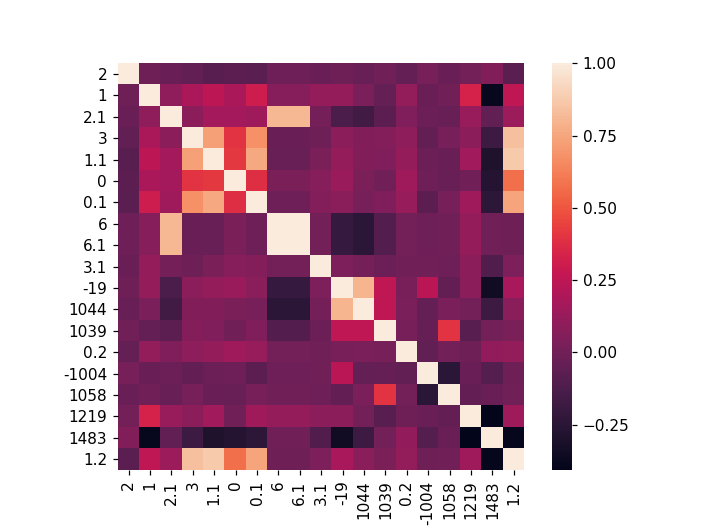

In [2]:
data_read = pd.read_csv('Tpo_dataset.csv')

print(data_read.columns)
cor_for = data_read.corr()

sns.heatmap(cor_for,square=True)

In [3]:
standard_scaler = preprocessing.StandardScaler()
scaled_data = standard_scaler.fit_transform(data_read)
print(scaled_data)

[[-1.73032994  1.38112796 -0.09406634 ...  2.92241216 -0.77677361
   0.10494141]
 [-1.7268865   1.38112796 -0.09406634 ...  0.5715828  -0.77677361
   0.10494141]
 [-1.72344306  1.38112796 -0.11372987 ...  0.99243652 -1.06122095
   0.5117663 ]
 ...
 [ 1.72344306  1.38112796 -0.08423457 ... -0.75332706 -0.67224778
  -0.30188348]
 [ 1.7268865  -0.72404587 -0.14322516 ... -0.98288363  0.79968153
  -0.91212082]
 [ 1.73032994 -0.72404587 -0.11372987 ...  1.29000986 -0.27642045
  -0.91212082]]


In [4]:
data = pd.DataFrame(scaled_data)
# reduce to 2 importants features


pca_algo = PCA(n_components=2)
data = pca_algo.fit_transform(data)
# standardize these 2 new features
standard_scaler = preprocessing.StandardScaler()
scaled_d = standard_scaler.fit_transform(data)
data = pd.DataFrame(scaled_d)

print(data)

             0         1
0     0.733190 -0.143076
1     0.658977  0.271196
2     0.440424  0.165921
3     0.125754 -0.178191
4     0.259838 -0.125041
5     0.279036 -0.107387
6    -0.112878 -0.013530
7     2.302855 -0.139772
8     2.460260  0.167435
9     2.219892 -0.176688
10    2.472735  0.306581
11    2.571519 -0.005129
12    2.617819  0.012344
13   -0.325857 -0.073459
14   -0.485250 -0.156963
15   -0.297813 -0.058925
16   -0.797172 -0.157752
17    0.451924 -0.181312
18    0.199302 -0.150536
19    0.304280 -0.017294
20   -0.572490 -0.179581
21   -0.984726  0.125185
22    0.157979  0.000541
23    0.154474 -0.042787
24   -0.094261 -0.117454
25   -0.218117 -0.044682
26   -0.172458 -0.009596
27   -0.542610 -0.119067
28   -0.974798  0.100702
29   -0.066819  0.079603
...        ...       ...
976  -0.803381 -0.147111
977  -0.383619 -0.201983
978  -0.040166 -0.478483
979  -0.406023 -0.115246
980  -0.719781 -0.045225
981  -0.464673 -0.004407
982  -0.722788 -0.383084
983  -0.451339 -0.441557


[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0), KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    

<IPython.core.display.Javascript object>


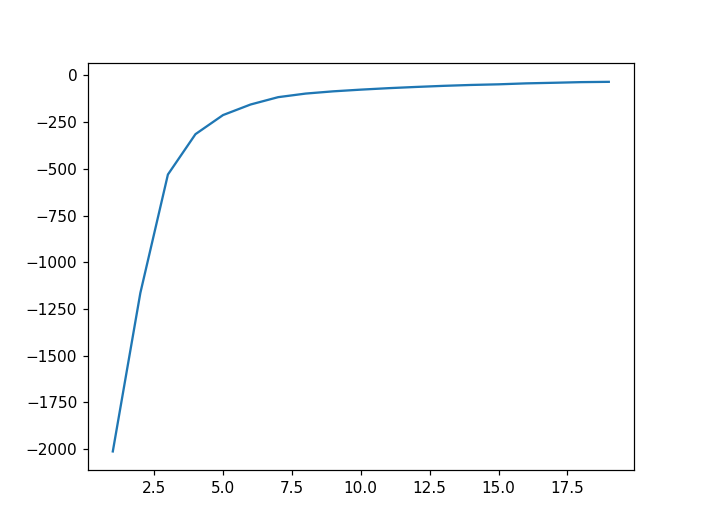

In [5]:
#(elbow method)
no_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in no_clusters]
print(kmeans)
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(no_clusters, scores)
plt.show()

In [6]:
df = data_read
df['cluster'] = kmeans[15].predict(data)
df['cluster'].value_counts()

15    174
0     166
8     160
5     127
2      99
4      60
12     55
14     49
6      44
3      28
7      16
10     13
13      7
11      6
9       1
1       1
Name: cluster, dtype: int64

<IPython.core.display.Javascript object>


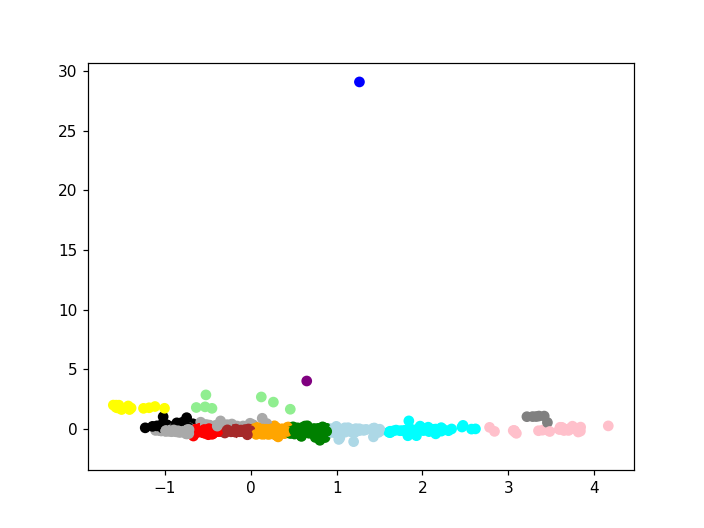

In [7]:
#plot the different clusters with the 2 main features
fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey',15: 'darkgrey'}
ax.scatter(data[0],data[1], c=df["cluster"].apply(lambda x: colors[x]))
plt.show()

In [8]:
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = cf.getDistanceByPoint(data, kmeans[14])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)
print(df['anomaly21'])

/Users/monk/Desktop/new_models/Unsupervised_Anomaly_Detection/custom_function.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  distance.set_value(i, np.linalg.norm(Xa-Xb))


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
976     0
977     0
978     0
979     0
980     0
981     0
982     0
983     0
984     0
985     0
986     0
987     0
988     0
989     0
990     0
991     0
992     0
993     0
994     0
995     0
996     0
997     0
998     0
999     0
1000    0
1001    0
1002    0
1003    0
1004    0
1005    0
Name: anomaly21, Length: 1006, dtype: int64


In [9]:
count_ano=0
index_no=[]
for i,j in enumerate(df['anomaly21']):
    if j!=0:
        count_ano+=1
        index_no.append(i)
print(count_ano)
print(index_no)
# [49, 51, 182, 186, 201, 202, 531, 637, 703, 872]


10
[49, 182, 185, 186, 201, 202, 531, 637, 703, 872]


<IPython.core.display.Javascript object>


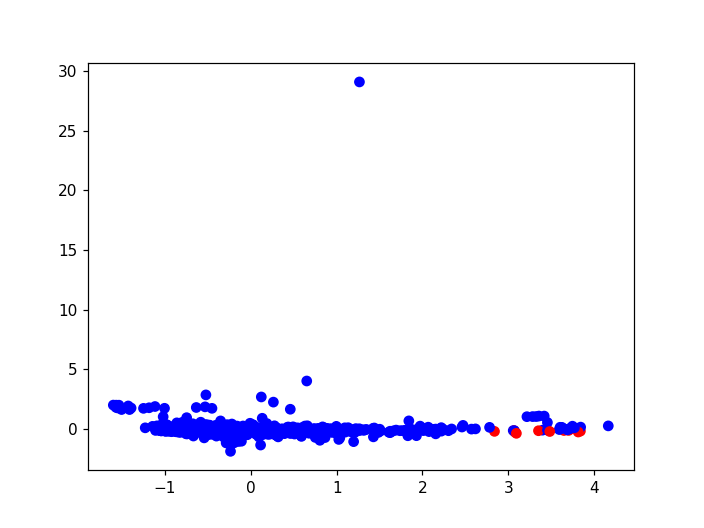

In [10]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots()
colors = {0:'blue', 1:'red'}
ax.scatter(data[0], data[1], c=df["anomaly21"].apply(lambda x: colors[x]))
plt.show()

In [11]:
#isolation method
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)
# add the data to the main  
df['anomaly25'] = pd.Series(model.predict(data))
print(pd.Series(model.predict(data)))
df['anomaly25'] = df['anomaly25'].map( {1: 0, -1: 1} )
print(df['anomaly25'].value_counts())
ano_index=[]
for i,j in enumerate(df['anomaly25']):
    if j!=0:
        ano_index.append(i)
print(ano_index)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
976     1
977     1
978     1
979     1
980     1
981     1
982     1
983     1
984     1
985     1
986     1
987     1
988     1
989     1
990     1
991     1
992     1
993     1
994     1
995     1
996     1
997     1
998     1
999     1
1000    1
1001    1
1002    1
1003    1
1004    1
1005    1
Length: 1006, dtype: int64
0    995
1     11
Name: anomaly25, dtype: int64
[134, 279, 434, 436, 579, 581, 597, 599, 600, 701, 702]
